## Churn Prediction in Banking Sector##

### Introduction
Customer churn rate based on the behavior of bank customers is one of the important key business metrics as it can help develop business strategies to reduce the cost. This project analyzes the behavior of bank customers who are more likely to leave the bank (or close the bank account). The model will utilize exploratory data analysis and some predictive analytics techniques to identify the potential customers that are likely to churn. As the project moves forward further analysis techniques and opportunities will be explored. The project has the following objectives - 
1. Predict the chances of any customer leaving the bank.
2. Identify and analyze the major indicators of a customer churn.
3. Develop strategies that can be used to minimize the customer churn rate.
The data for this analysis is taken from publicly available Kaggle database. 

In [1]:
#Import dataset (the list will be expanded as the project moves forward!)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

#from library.sb_utils import save_file

dataset = pd.read_csv('https://raw.github.com/neupanebinod/Capstone-Project-II/master/Capstone-Project-II/Churn_Modelling.csv')
#Checking first five rows of the dataset
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [2]:
#Checking column information
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
#Checking statistical summary of numerical values
dataset.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [4]:
#Checking data types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Rechecking if any missing values are present
missing = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

count    %
RowNumber            0  0.0
CustomerId           0  0.0
Surname              0  0.0
CreditScore          0  0.0
Geography            0  0.0
Gender               0  0.0
Age                  0  0.0
Tenure               0  0.0
Balance              0  0.0
NumOfProducts        0  0.0
HasCrCard            0  0.0
IsActiveMember       0  0.0
EstimatedSalary      0  0.0
Exited               0  0.0

In [7]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
#Since we are interested in evaluating the churn rate, our target variable is 'Exited' 
#Check target variable information
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
#Check categorical variables
dataset.select_dtypes('object')

Surname Geography  Gender
0      Hargrave    France  Female
1          Hill     Spain  Female
2          Onio    France  Female
3          Boni    France  Female
4      Mitchell     Spain  Female
...         ...       ...     ...
9995   Obijiaku    France    Male
9996  Johnstone    France    Male
9997        Liu    France  Female
9998  Sabbatini   Germany    Male
9999     Walker    France  Female

[10000 rows x 3 columns]

In [10]:
dataset.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [11]:
#Drop columns that are not important in the analysis
dataset = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
dataset.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [12]:
# Descriptive statistics of the final dataset
dataset.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [13]:
#average of each features 
dataset.groupby("Exited").agg("mean")

CreditScore        Age    Tenure       Balance  NumOfProducts  \
Exited                                                                  
0        651.853196  37.408389  5.033279  72745.296779       1.544267   
1        645.351497  44.837997  4.932744  91108.539337       1.475209   

        HasCrCard  IsActiveMember  EstimatedSalary  
Exited                                              
0        0.707146        0.554565     99738.391772  
1        0.699067        0.360825    101465.677531

In [15]:
#Average age by gender
dataset.groupby("Gender").agg({"Age": "mean"})

Age
Gender           
Female  39.238389
Male    38.658237

In [21]:
# Churn rate based on geography
dataset.groupby("Geography").agg({"Exited": "count"})

Exited
Geography        
France       5014
Germany      2509
Spain        2477

In [22]:
# Number of both the churned and non-churned customers, grouped by active membership and credit card possession
dataset.groupby(["IsActiveMember", "HasCrCard"]).agg({"Exited" : "count"})

Exited
IsActiveMember HasCrCard        
0              0            1401
               1            3448
1              0            1544
               1            3607

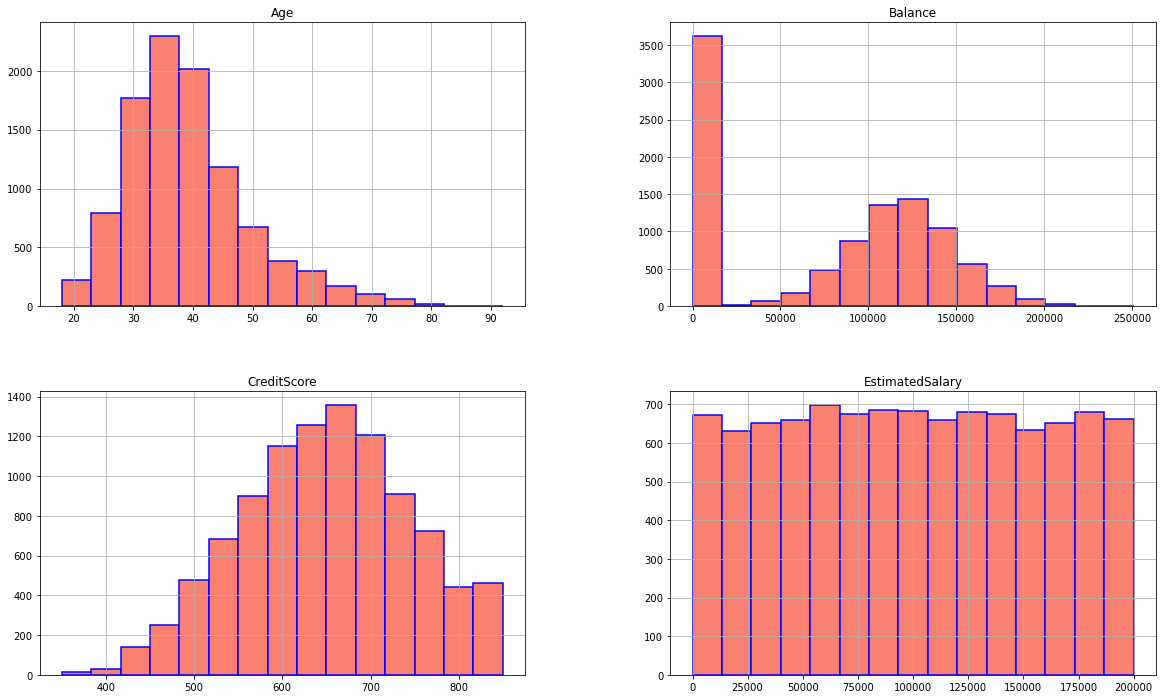

In [23]:
distribution = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
dataset[distribution].hist(figsize = (20, 12), bins = 15, layout = (2, 2), 
                          color = 'salmon', edgecolor = 'blue', linewidth = 1.5);

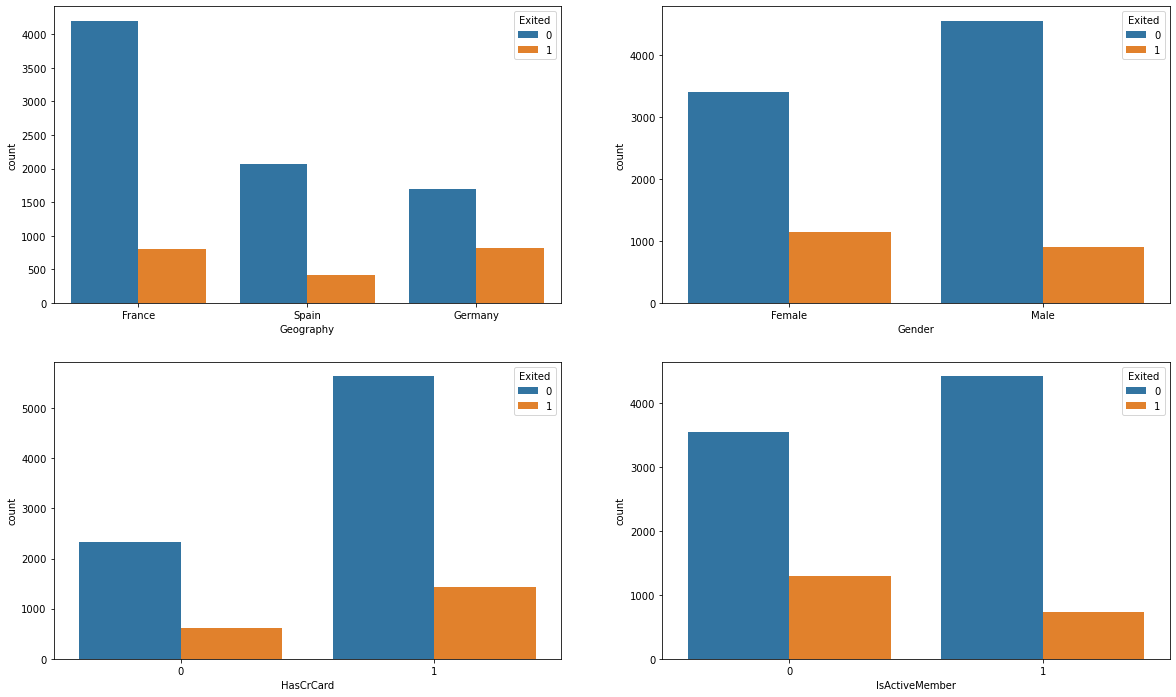

In [24]:
# Plotting categorical variables to visualize target variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

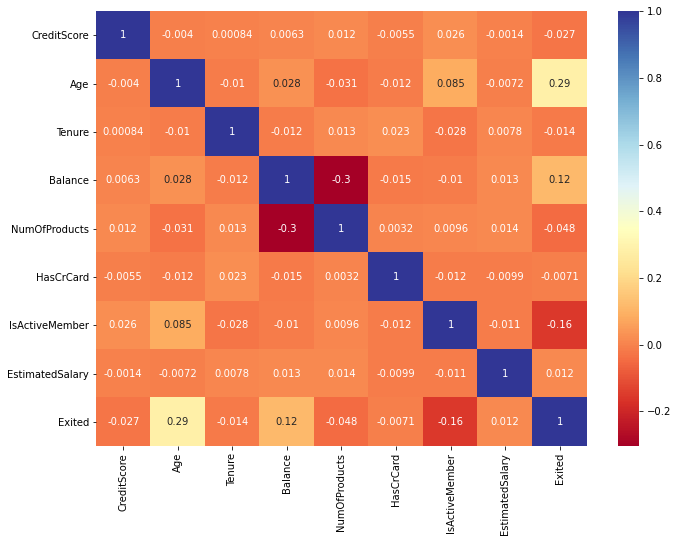

In [29]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
plt.subplots(figsize=(11,8))
sns.heatmap(corr, annot=True, cmap="RdYlBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [104]:
dataset1 = pd.get_dummies(data=dataset, columns=['Gender','Geography'])
df= pd.concat([dataset, dataset1], axis=1)
df.drop(columns =['Gender', 'Geography'],axis=1, inplace=True)
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  CreditScore  ...  NumOfProducts  \
0               1        101348.88       1          619  ...              1   
1               1        112542.58       0          608  ...              1   
2               0        113931.57       1          502  ...              3   
3               0         93826.63       0          699  ...              2   
4               1         79084.10       0          850  ...              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Female  \
0          1               1        101348.88       1              1   
1          0               1        112542.58       0              1   
2          1               0        113931.57       1              1   
3          0               0         93826.63       0              1   
4          1               1         79084.10       0              1   

   Gender_Male  Geography_France  Geography_Germany  Geography_Spain  
0            0                 1                  0                0  
1            0                 0                  0                1  
2            0                 1                  0                0  
3            0                 1                  0                0  
4            0                 0                  0                1  

[5 rows x 23 columns]

In [105]:
scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Tenure','Balance', 'EstimatedSalary']
df[scl_columns] = scaler.fit_transform(df[scl_columns])
df.head()

CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848              1          1   
1    -0.440036  0.198164 -1.387538  0.117350              1          0   
2    -1.536794  0.293517  1.032908  1.333053              3          1   
3     0.501521  0.007457 -1.387538 -1.225848              2          0   
4     2.063884  0.388871 -1.041760  0.785728              1          1   

   IsActiveMember  EstimatedSalary  Exited  CreditScore  ...  NumOfProducts  \
0               1         0.021886       1    -0.326221  ...              1   
1               1         0.216534       0    -0.440036  ...              1   
2               0         0.240687       1    -1.536794  ...              3   
3               0        -0.108918       0     0.501521  ...              2   
4               1        -0.365276       0     2.063884  ...              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Gender_Female  \
0          1               1         0.021886       1              1   
1          0               1         0.216534       0              1   
2          1               0         0.240687       1              1   
3          0               0        -0.108918       0              1   
4          1               1        -0.365276       0              1   

   Gender_Male  Geography_France  Geography_Germany  Geography_Spain  
0            0                 1                  0                0  
1            0                 0                  0                1  
2            0                 1                  0                0  
3            0                 1                  0                0  
4            0                 0                  0                1  

[5 rows x 23 columns]

####Random Forest Model

In [126]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
X = df.drop('Exited',axis='columns')#feature variables
y = df['Exited']# target variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [128]:
X_train.shape, X_test.shape

((8000, 21), (2000, 21))

In [129]:
y_train.shape, y_test.shape

((8000, 2), (2000, 2))

In [130]:
X_train.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Gender_Female          uint8
Gender_Male            uint8
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [111]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

In [139]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 42,n_jobs=-1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
ac = accuracy_score(pred, y_test)
print(ac)

0.8685


In [146]:
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
print('Random Forest: f1-score=%.3f' % (f1))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 3000]

In [136]:
clf = RandomForestClassifier(n_estimators=300, random_state = 42,n_jobs=-1)
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
clf_rf = GridSearchCV(clf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train, y_train)
best_clf_rf.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [137]:
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 3000]

In [141]:
from sklearn import metrics 
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

TypeError: list indices must be integers or slices, not tuple

Feature:CreditScore, Score:0.0712
Feature:Age, Score:0.1207
Feature:Tenure, Score:0.0397
Feature:Balance, Score:0.0705
Feature:NumOfProducts, Score:0.0703
Feature:HasCrCard, Score:0.0096
Feature:IsActiveMember, Score:0.0192
Feature:EstimatedSalary, Score:0.0727
Feature:CreditScore, Score:0.0716
Feature:Age, Score:0.1143
Feature:Tenure, Score:0.0399
Feature:Balance, Score:0.0723
Feature:NumOfProducts, Score:0.0623
Feature:HasCrCard, Score:0.0095
Feature:IsActiveMember, Score:0.0242
Feature:EstimatedSalary, Score:0.0731
Feature:Gender_Female, Score:0.0097
Feature:Gender_Male, Score:0.0098
Feature:Geography_France, Score:0.0102
Feature:Geography_Germany, Score:0.0198
Feature:Geography_Spain, Score:0.0094


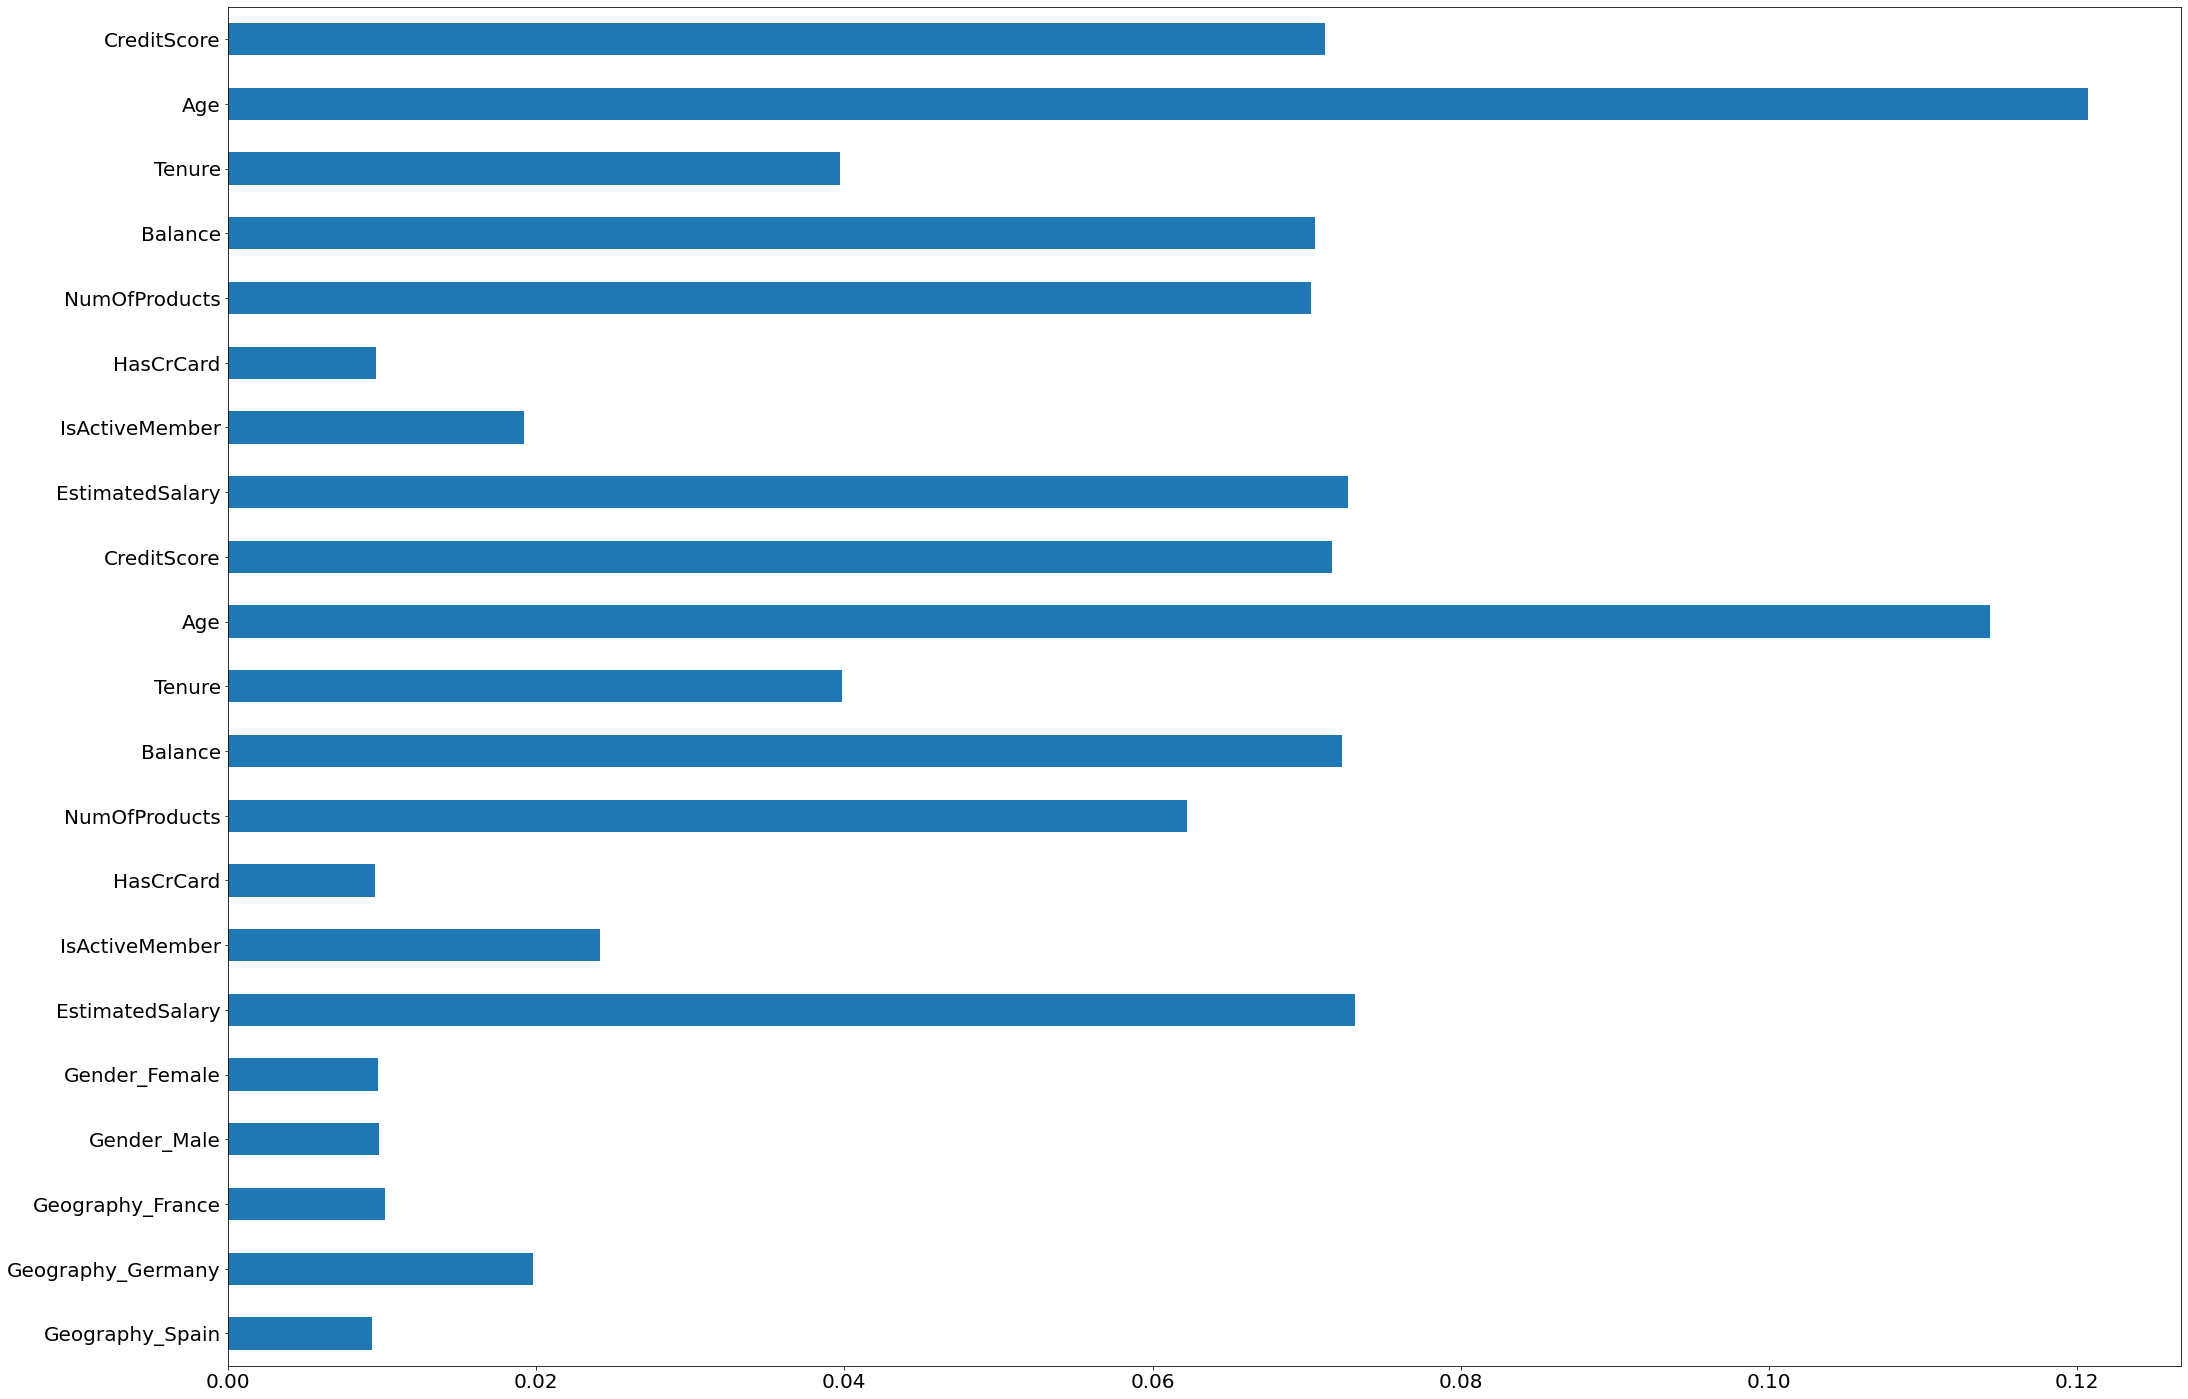

In [125]:
#Summarizing and plotting feature importance
#Getting importance
importance = clf.feature_importances_
#Summarizing feature importance
for i,v in enumerate(importance):
    print("Feature:{0:}, Score:{1:,.4f}".format(X.columns[i], v))
#Plotting feature importance
pd.Series(clf.feature_importances_[::-1], index=X.columns[::-1]).plot(kind="barh", figsize=(35,25),fontsize=20)

### Attempting Logistic Regression 

In [135]:
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

ValueError: y should be a 1d array, got an array of shape (8000, 2) instead.